In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors

df = pd.read_csv("data/allendale-students.csv")

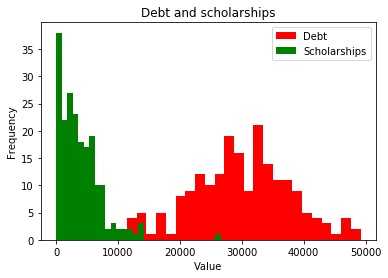

In [9]:
n_bins = 30
colors = ["red", "green"]
plt.hist(df.debt, bins=n_bins, color=colors[0])
plt.hist(df.scholarship, bins=n_bins, color=colors[1])
plt.ylabel('Frequency')
plt.xlabel('Value')
plt.title("Debt and scholarships")
labels= ["Debt","Scholarships"]
_ = plt.legend(labels)

In [10]:
df_with_dummies = pd.get_dummies(df).drop(columns=['housing_off campus', 'major_STEM']) 
df_with_dummies.columns = df_with_dummies.columns.str.replace(' ', '_')
df_with_dummies # off-campus and stem majors are reference catgories

,distance,scholarship,parents,car,debt,housing_on_campus,major_business,major_other
0,40,1532,0.440,6,26389,0,0,0
1,30,7479,0.265,7,21268,1,0,0
2,130,2664,0.115,3,32312,1,1,0
3,120,1998,0.325,9,28539,1,1,0
4,30,1462,0.105,10,34867,0,0,1
...,...,...,...,...,...,...,...,...
195,30,5321,0.445,8,21873,0,0,0
196,50,5916,0.020,10,33122,0,0,0
197,410,5583,0.200,7,33666,1,1,0
198,320,1282,0.250,4,44262,0,1,0


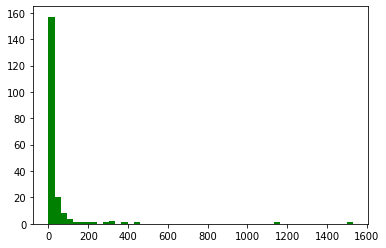

In [11]:
df['scholarship_debt'] = df['debt']/ df['scholarship']
n_bins = 50
_ = plt.hist(df['scholarship_debt'], bins=n_bins, color=colors[1])

In [12]:
import statsmodels.api as sm
from itertools import combinations
import statsmodels.formula.api as smf

In [13]:
predictors = df_with_dummies.drop(columns='debt')
cols = predictors.columns

In [14]:
predictor_list = [list(combinations(cols, x)) for x in range(1, len(cols)-1)]

In [16]:
formula_list = []

for i in range(1, len(cols) -1):
    iters = combinations(cols[0:9], i)
    for item in iters:
        formula = " + ".join(item)
        formula = "debt ~ " + formula
        formula_list.append(formula)



119

In [82]:

["debt ~ " +" + ".join(x) for x in combos]

[]

In [83]:
def get_r_sq(model):
    mod = smf.ols(formula=model, data=df_with_dummies)
    res = mod.fit()
    return res.rsquared_adj

results = map(get_r_sq, formula_list)

def count_params(model):
    params = model.replace("+", ",")
    params = params.replace("debt ~", "")
    n_params = params.count(',') + 1
    return n_params

params = map(count_params, formula_list)


In [57]:
adj_r_df = pd.DataFrame({'model': formula_list, "adj_rsq": output, "n_params": params})
adj_r_df 

,model,adj_rsq,n_params
0,debt ~ distance,0.244302,1
1,debt ~ scholarship,0.410439,1
2,debt ~ parents,0.136616,1
3,debt ~ car,-0.005043,1
4,debt ~ housing_on_campus,0.004770,1
...,...,...,...
114,debt ~ scholarship + parents + car + housing_o...,0.565060,5
115,debt ~ scholarship + parents + car + major_bus...,0.561081,5
116,debt ~ scholarship + parents + housing_on_camp...,0.568194,5
117,debt ~ scholarship + car + housing_on_campus +...,0.407258,5
